In [2]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import quad, fixed_quad, trapezoid, simpson, nquad
from sympy import symbols, diff, integrate, lambdify

# Parcial II - Métodos Computacionales (Integrales y Matrices)
**2024-2**

---

*Nombre:* Kevin Cortés Cordero

*Identificación:* 1032010342

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub (en su carpeta) y recuerde hacer pull-request

# 1

**(20 puntos)**
Considera la siguiente integral:

$$
I = \int_0^1 \int_{x^2}^{x+1} \int_{y^2}^{y+2} \int_{z^2}^{z+3} (x+y+z+w) \, dw \, dz \, dy \, dx
$$

Encuentre la solución númerica usando unicamente `quad`. Encuentre el error relativo, para esto emplee el siguiente código que usa `nquad`:


```python
# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

# Calcular la integral usando nquad
result, error = nquad(
    integrand,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")
```



In [3]:
integrand = lambda w, z, y, x: x + y + z + w

w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

result, error = nquad(
    integrand,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")

integrando = lambda w, z, y, x: x + y + z + w

lim_wa = lambda z, y, x: z**2
lim_wb = lambda z, y, x: z+3
lim_za = lambda y, x: y**2
lim_zb = lambda y, x: y+2
lim_ya = lambda x: x**2
lim_yb = lambda x: x+1

def integral_w(z, y, x):
    return quad(lambda w: integrando(w, z, y, x), lim_wa(z, y, x), lim_wb(z, y, x))[0]

def integral_z(y, x):
    return quad(lambda z: integral_w(z, y, x), lim_za(y, x), lim_zb(y, x))[0]

def integral_y(x):
    return quad(lambda y: integral_z(y, x), lim_ya(x), lim_yb(x))[0]

resultado = quad(integral_y, 0, 1)

print(f"Resultado de la integral con nquad: {result}")
print(f"Error estimado con nquad: {error}")
print(f"Resultado de la integral con quad: {resultado[0]}")
print(f"Error estimado con quad: {resultado[1]}")
print(f"Error relativo: {abs(resultado[0] - result)}")

Resultado de la integral: -0.6500971589021813
Error estimado: 1.8391891749223705e-12
Resultado de la integral con nquad: -0.6500971589021813
Error estimado con nquad: 1.8391891749223705e-12
Resultado de la integral con quad: -0.6500971589021813
Error estimado con quad: 1.5813253071872154e-13
Error relativo: 0.0


# 2

**(40 puntos)**
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo.


Para
* $a$ = 1,
* $I$ = 3,
* $μ0/4π$ = 1


Usando funciones explicitas explique claramente las entradas, salidas y procedimientos dentro de las mismas. Recuerde para resolver las integrales usar `quad` y grafique para:

*a)* $A_φ(r = 1.1, θ)$ vs. $0\leq θ\leq \pi$

*b)* $A_φ(r, θ = π∕3)$ vs. $0\leq r \leq 10$

Tenga cuidado con la convergencia de su integral



<ipython-input-4-856fd6b28662>:19: RuntimeWarning: invalid value encountered in scalar divide
  return ((4 * 3 * 1) / (1**2 + r**2 + 2 * 1 * r * np.sin(theta))) * (numerator / k)


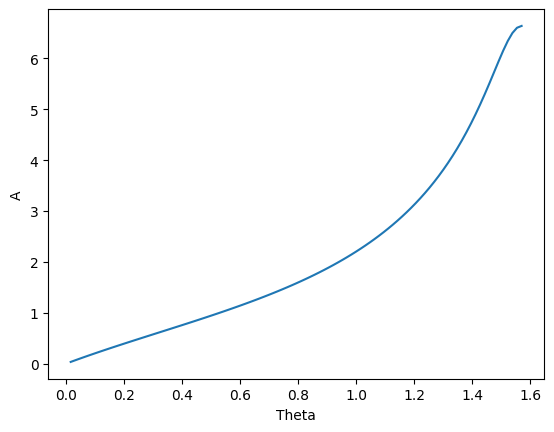

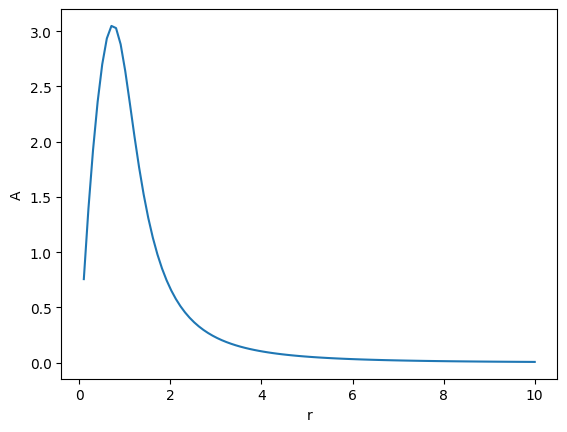

In [4]:
def K2(r, theta):
    return (4 * r * np.sin(theta)) / (1 + r**2 + 2 * r * np.sin(theta))

def K(r, theta):
    k = K2(r, theta)
    integrand = lambda x: 1 / np.sqrt(1 - k * (np.sin(x)**2))
    return quad(integrand, 0, np.pi/2)[0]

def E(r, theta):
    k = K2(r, theta)
    integrand = lambda x: np.sqrt(1 - k* (np.sin(x)**2))
    return quad(integrand, 0, np.pi/2)[0]

def A(r, theta):
    k = K2(r, theta)
    K_val = K(r, theta)
    E_val = E(r, theta)
    numerator = (2 - k) * K_val - 2 * E_val
    return ((4 * 3 * 1) / (1**2 + r**2 + 2 * 1 * r * np.sin(theta))) * (numerator / k)

#Gráfica de A con r fijo
r = 1.1
theta = np.linspace(0, np.pi/2, 100)
A_vals = np.array([A(r, t) for t in theta])

plt.plot(theta, A_vals)
plt.xlabel('Theta')
plt.ylabel('A')
plt.show()
print()

# Grafico de A con theta fijo
r_vals = np.linspace(0, 10, 100)
theta = np.pi/3
A_values = np.array([A(t, theta) for t in r_vals])

plt.plot(r_vals, A_values)
plt.xlabel('r')
plt.ylabel('A')
plt.show()

# 3

(**40 puntos**) El **método de la potencia inversa** es una técnica iterativa utilizada para calcular el autovalor de menor magnitud de una matriz cuadrada. Es una variante del **método de la potencia**, que normalmente encuentra el autovalor de mayor magnitud. Para ello, se aprovecha la propiedad de la matriz inversa:

$$ A^{-1} v = \frac{1}{\lambda} v $$


## Algoritmo

El método de la potencia inversa sigue los siguientes pasos:

1. Elegir un vector inicial $x^{(0)}$ no nulo.

2. Para cada iteración $k$, resolver el sistema lineal:
   
   $$ A y^{(k)} = x^{(k-1)} $$
   
   donde $y^{(k)}$ es un **vector intermedio** que se obtiene resolviendo el sistema lineal. Este vector representa la solución del sistema en cada iteración y es crucial para aproximar el autovector de menor autovalor.

3. Normalizar $y^{(k)}$ para obtener un nuevo vector de iteración:
   
   $$ x^{(k)} = \frac{y^{(k)}}{\| y^{(k)} \|} $$
   
4. Aproximar el autovalor mediante el cociente de Rayleigh:
   
   $$ \lambda^{(k)} = \frac{(x^{(k)})^T A x^{(k)}}{(x^{(k)})^T x^{(k)}} $$
   
5. Repetir los pasos anteriores hasta que la diferencia entre valores sucesivos de $\lambda$ sea menor que un umbral de tolerancia.

---

*a)* Escriba una función llamada `potencia_inversa` que dada una matriz A encuentre su valor propio menos dominante (con una tolerancia de 1e-7 usando la norma Euclidiana) y su correspondiente autovector. Para obtener $y^{(k)}$ puede emplear `np.linalg.solve` recordando que $Ay = x$.

*b)* Usando la matriz A, encuentre el $\lambda_{min}$ y el correspondiente autovector. Examine la convergencia de su autovalor en función de las iteraciones, esto es, haga un gráfico de $\lambda(k)$

$$
\begin{bmatrix}
5 & 2 \\
2 & 2
\end{bmatrix}
$$

*c)* Compare su resultado con `np.linalg.eig`

Autovalor mínimo (potencia inversa): 1.0
Autovalor mínimo (np.linalg.eig): 0.9999999999999999
Autovector asociado:
[-0.72437793  0.4741478   0.50046026]


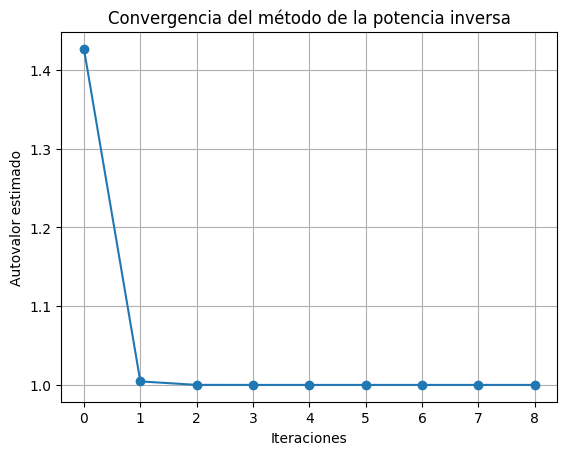

In [5]:
#a
def potencia_inversa(A, tol=1e-7, max_iter=1000):
    n = A.shape[0]
    v1 = np.random.rand(n)
    v1 = v1 / np.linalg.norm(v1)

    valores_lambda = []

    for _ in range(max_iter):
        v2 = np.linalg.solve(A, v1)
        v3 = v2 / np.linalg.norm(v2)

        l1 = np.dot(v3.T, np.dot(A, v3)) / np.dot(v3.T, v3)
        valores_lambda.append(l1)

        if np.linalg.norm(v3 - v1) < tol:
            break

        v1 = v3

    return l1, v3, valores_lambda

#b
A = np.array([[5, 4, 2],
              [4, 5, 2],
              [2, 2, 2]])

l_min, autovec, lista_lambda = potencia_inversa(A)

#c
autovalores, autovectores = np.linalg.eig(A)
l_real = min(autovalores)

#Resultados y grafica
print(f"Autovalor mínimo (potencia inversa): {l_min}")
print(f"Autovalor mínimo (np.linalg.eig): {l_real}")
print(f"Autovector asociado:\n{autovec}")

plt.plot(lista_lambda, marker='o', linestyle='-')
plt.xlabel("Iteraciones")
plt.ylabel("Autovalor estimado")
plt.title("Convergencia del método de la potencia inversa")
plt.grid()
plt.show()

#4

**(10 puntos)**
Sea $A$ una matriz cuadrada de tamaño $n \times n$. Se sabe que el determinante de una matriz es igual al producto de sus autovalores:

$$
\det(A) = \prod_{i=1}^{n} \lambda_i
$$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando una matriz aleatoria $A$ de $5\times 5$, demuestre esta propiedad. Puede usar las funciones de `np.linalg`.

In [6]:
from numpy import random

A = np.random.randint(10, size=(5, 5))
print(A)

det = np.linalg.det(A)
print(det)

autovalores = np.linalg.eigvals(A)
print(autovalores)
det2 = np.prod(autovalores)
print(det2)

#El valor que se calcula con np.linalg es aproximadamente el valor que se obtiene con el método manual.

[[4 7 1 6 9]
 [2 9 7 2 1]
 [3 7 6 2 8]
 [1 1 3 0 4]
 [9 8 1 9 9]]
-1372.000000000001
[24.35607076+0.j          6.54472428+0.j         -3.08226668+0.j
  0.09073582+1.66859715j  0.09073582-1.66859715j]
(-1371.9999999999952+0j)
